In [15]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

aa = np.load('my_cmap.npy').item()
colores = {'SOS': 'red', 'MOS': 'black', 'EOS': 'orange'}
markers = {'SOS': 5, 'MOS': 'd', 'EOS': 4}

def FC(datos, indice):
    
    data = pd.read_excel(datos, sheetname='datos')
    data = data.round(2)
    data = data.set_index(indice)
    #days = pd.read_excel(datos, sheetname='dias')
    #days = days.set_index('Parametro')
    #Probamos hacer una lista de colores para poder invertirla
    #No hay que invertir, se usa counterclock=False!
    
    subgroup_names=[i for i in range(len(data[data.columns[0]]))]
    subgroup_size= len(data[data.columns[0]])*[10]
    months_size = 12*[30]
    month_names=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

    #Rampa de colores, Quizas quedaria mejor una personalizada y que fuera desde -1 hasta 1 (por si incluye agua)
    c = plt.cm.YlGn

    #norm = mpl.colors.Normalize(vmin=0.5, vmax=0.75)
    # First Ring (outside)
    fig, ax = plt.subplots(figsize=(20, 20))
    #plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
    ax.axis('equal')
    #mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)])
    #plt.setp( mypie, width=0.3, edgecolor='red')

    #Normalizacion de valores
    #norm = mpl.colors.Normalize(vmin=0.5,vmax=0.75)

    # Second Ring (Inside)
    r = 1
    rlist = []
    
    minimo = min(data.min()) -0.2
    maximo = max(data.max())
    norm = mpl.colors.Normalize(vmin=minimo,vmax=maximo)
        
    for i in data.columns:
        
        
        
        #norm2 = mpl.colors.Normalize(vmin=0.35,vmax=0.85)
        
        mypie, _ = ax.pie(subgroup_size, radius=r, startangle=90, counterclock=False, colors = [c(norm(n)) for n in data[i]])
                           #colors = [c(norm(n)) for n in data[i]])
                            #diccionario con los valores
                           #colors=[aa[int(n*100)] for n in data[i]
                          #[c[str(n)] for n in data[i]][::-1])
        #[c(norm2(i)) for i in data[i]][::-1])
        plt.setp(mypie, width=0.1, edgecolor='none')
        plt.margins(0,0)
        
        #Empezamos a plotear los seasonsdays
        
        #colorbar(cm.RdYlGn)
        rlist.append('{:1f}'.format(r))
        r+=0.1

        

        #print(rlist)
        
    #for i in rlist:
        
        circle = plt.Circle((0, 0), r-0.2, color='black', lw=0.5, fill=False)
        ax.add_artist(circle)
        
        #lista = [15, 105, 180, 277]
        
        #Meter esto dentro del bucle para hacer pruebas    
    
    circle2 = plt.Circle((0, 0), r-0.1, color='black', lw=2, fill=False)
    ax.add_artist(circle2)
    ax.grid(False)
    
    mypie7, _ = ax.pie(months_size, radius=float(max(rlist)), startangle=90, labels=month_names, counterclock=False, 
                   colors=['none', 'none', 'none'])
    plt.setp( mypie7, width=len(rlist)/10, edgecolor='black', lw=1)
    plt.margins(0,0)
    
    #lineas = [45, 135, 190, 250]
    '''for i in lineas:
        
        rc = 0.9
        inipoint = (rc*math.cos(i/180.0*math.pi))
        end = (rc*math.sin(i/180.0*math.pi))
        ax.plot((inipoint, 1.1*math.cos(i/180.0*math.pi)), (end, 1.1*math.sin(i/180.0*math.pi)), lw=3)'''
        
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
       
    ax_cb = fig.add_axes([.9,.25,.015,.25])
    cmm = [i for i in aa.values()]
    cmap = mpl.colors.ListedColormap(cmm)
    #b2 = [round(i,2) for i in np.linspace(minimo, maximo, 5)]
    bounds = np.linspace(0,1,100)
    #bounds = np.linspace(minimo, maximo, 5)#[-1.0, -0.5, -0.2, 0.0, 0.5, 1.0]
    #norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                    boundaries= bounds,
                                    ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                                    spacing='uniform',
                                    orientation='vertical')
    cb.set_label('Custom extension lengths, some other units')
    cb.ax.yaxis.set_label_position(position='left')
    cb.ax.set_alpha(.5)
    cb.set_label('NDVI Values')
    
    #print(rlist)
    plt.savefig(r'C:\Users\Diego\Desktop\Phenocircle\phenologyGraphY.jpg', dpi=300)
    return plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


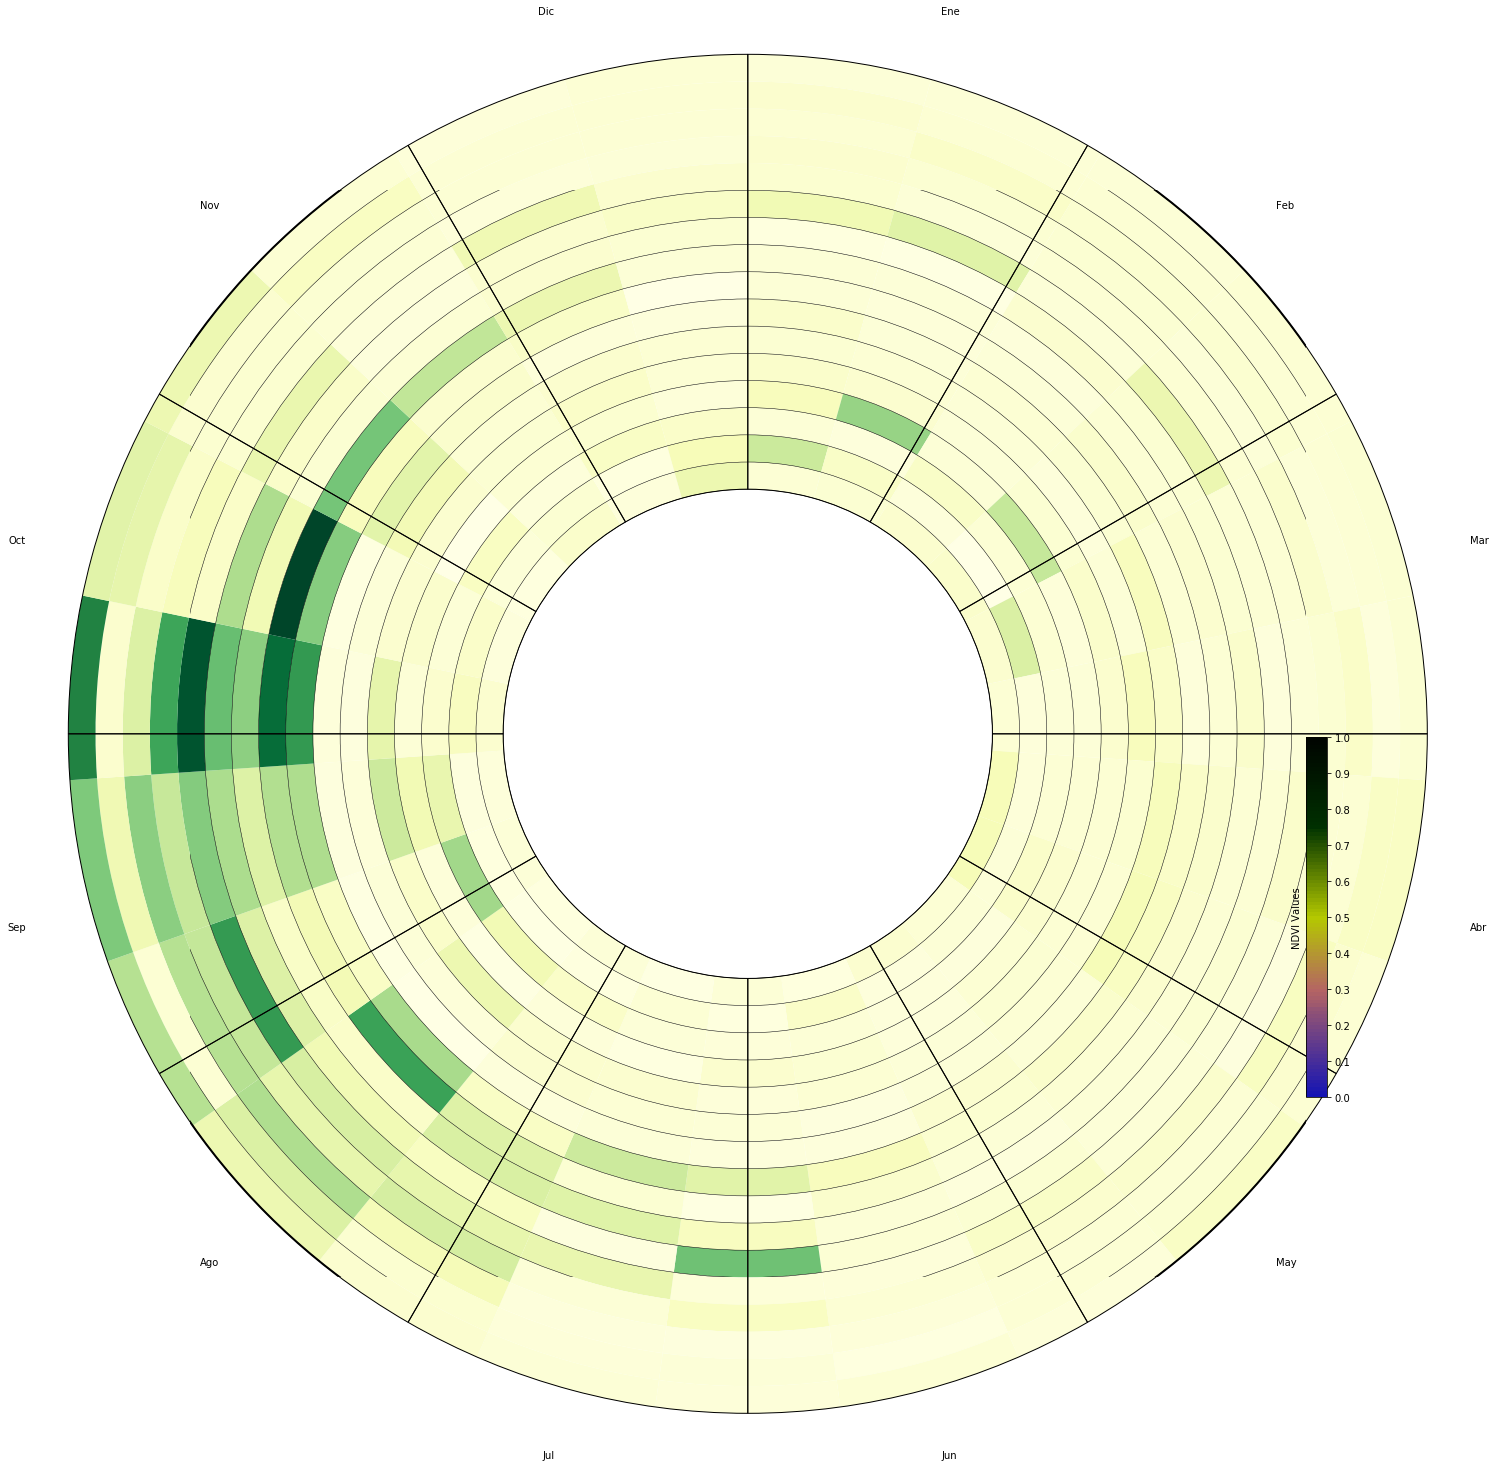

In [16]:
FC(r'C:\Users\Diego\Desktop\Phenocircle\PhenoEmbalsesVDCNS.xlsx', 'doy')

# Vamos a tratar de leer una base de datos con todos los embalses (columnas) y fechas (filas) y plotearlas en 1) Un solo círculo y 2) directamente en un circulo para cada uno